MOVIE RECOMMENDATION SYSTEM USING ML

In [1]:

#IMPORTING THE REQUIRED LIBRARIES -
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import warnings
warnings.filterwarnings("ignore")

#VISUALISATION
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#MACHINE LEARNING MODEL
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
#LOADING THE REQUIRED DATASETS
df_movies= pd.read_csv('movies.csv') #contains data about movies
df_rating=pd.read_csv('ratings.csv') #contains data about ratings

#Since user data doesn't have any column name we are alloting column name.
column_names_users = ['user_id', 'gender', 'age', 'occupation', 'zipcode']
df_user= pd.read_csv('users.csv', delimiter = ';', names= column_names_users,header = 0)
df_user.dropna(inplace=True) #dropping na values


In [3]:
#dropping unwanted columns from movies dataset
df_movie=df_movies.drop('genres',axis=1)

In [4]:
#merging movies and ratings dataset on column movie id
movie_rating_df=pd.merge(df_movie,df_rating,on="movieId")
movie_rating_df.head()

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),1,4.0,964982703
1,1,Toy Story (1995),5,4.0,847434962
2,1,Toy Story (1995),7,4.5,1106635946
3,1,Toy Story (1995),15,2.5,1510577970
4,1,Toy Story (1995),17,4.5,1305696483


In [5]:
#creating a table with all needed columns
df = pd.concat([movie_rating_df,df_user], axis=1)
df.head()

,movieId,title,userId,rating,timestamp,user_id,gender,age,occupation,zipcode
0,1,Toy Story (1995),1,4.0,964982703,1.0,F,1.0,10.0,48067
1,1,Toy Story (1995),5,4.0,847434962,2.0,M,56.0,16.0,70072
2,1,Toy Story (1995),7,4.5,1106635946,3.0,M,25.0,15.0,55117
3,1,Toy Story (1995),15,2.5,1510577970,4.0,M,45.0,7.0,2460
4,1,Toy Story (1995),17,4.5,1305696483,5.0,M,25.0,20.0,55455


In [6]:
df.isna().any() #checking for null values

movieId       False
title         False
userId        False
rating        False
timestamp     False
user_id        True
gender         True
age            True
occupation     True
zipcode        True
dtype: bool

In [7]:
df=df.dropna() #dropping the null values

In [8]:
#ADDING NEW COLUMN
#to create seperate column for age group data

labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.age, range(0, 81, 10), right=False, labels=labels)
df[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,1.0,0-9
1,56.0,50-59
2,25.0,20-29
3,45.0,40-49
5,50.0,50-59
6,35.0,30-39
17,18.0,10-19


In [9]:
# We need to categorize the imdb values in the range of 1,2,3,4 and 5 to mark them as the bad,average,good and excellent movies respectively
df["rating"]=pd.cut(df['rating'], bins=[1,2,3,4,5], right=True, labels=False)+1

In [10]:
#First 500 extracted records
df.dropna(inplace=True)

In [11]:
df['gender']=df['gender'].replace('M',1)  #CONVERTING CATEGORICAL VALUE TO BINARY VALUE
df['gender']=df['gender'].replace('F',0)

EDA

In [12]:
df.describe()

,movieId,userId,rating,timestamp,user_id,gender,age,occupation
count,5748.000000,5748.000000,5748.000000,5.748000e+03,5748.000000,5748.000000,5748.000000,5748.000000
mean,92.287752,310.526444,2.692241,1.052242e+09,2997.955115,0.716249,30.740953,8.164057
std,69.166061,185.329731,0.918705,2.200185e+08,1740.336688,0.450857,12.860763,6.332890
min,1.000000,1.000000,1.000000,8.281246e+08,1.000000,0.000000,1.000000,0.000000
25%,31.000000,142.000000,2.000000,8.474352e+08,1494.750000,0.000000,25.000000,3.000000
50%,81.000000,313.000000,3.000000,9.731055e+08,2996.500000,1.000000,25.000000,7.000000
75%,158.000000,469.000000,3.000000,1.189457e+09,4491.250000,1.000000,35.000000,14.000000
max,223.000000,610.000000,4.000000,1.537799e+09,6040.000000,1.000000,56.000000,20.000000


In [13]:
df.shape

(5748, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5748 entries, 0 to 6039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   movieId     5748 non-null   int64   
 1   title       5748 non-null   object  
 2   userId      5748 non-null   int64   
 3   rating      5748 non-null   float64 
 4   timestamp   5748 non-null   int64   
 5   user_id     5748 non-null   float64 
 6   gender      5748 non-null   int64   
 7   age         5748 non-null   float64 
 8   occupation  5748 non-null   float64 
 9   zipcode     5748 non-null   object  
 10  age_group   5748 non-null   category
dtypes: category(1), float64(4), int64(4), object(2)
memory usage: 499.9+ KB


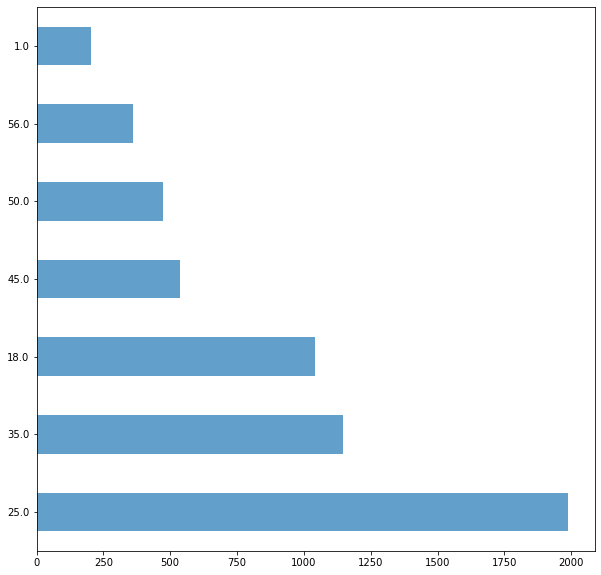

In [15]:
#Visualize user age distribution
df['age'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,10))
plt.show()

In [16]:
df

,movieId,title,userId,rating,timestamp,user_id,gender,age,occupation,zipcode,age_group
0,1,Toy Story (1995),1,3.0,964982703,1.0,0,1.0,10.0,48067,0-9
1,1,Toy Story (1995),5,3.0,847434962,2.0,1,56.0,16.0,70072,50-59
2,1,Toy Story (1995),7,4.0,1106635946,3.0,1,25.0,15.0,55117,20-29
3,1,Toy Story (1995),15,2.0,1510577970,4.0,1,45.0,7.0,2460,40-49
4,1,Toy Story (1995),17,4.0,1305696483,5.0,1,25.0,20.0,55455,20-29
...,...,...,...,...,...,...,...,...,...,...,...
6035,223,Clerks (1994),591,3.0,970524802,6036.0,0,25.0,15.0,32603,20-29
6036,223,Clerks (1994),594,3.0,1109037031,6037.0,0,45.0,1.0,76006,40-49
6037,223,Clerks (1994),597,2.0,941558145,6038.0,0,56.0,1.0,14706,50-59
6038,223,Clerks (1994),599,3.0,1498500829,6039.0,0,45.0,0.0,1060,40-49


SPLITTING THE DATASET FOR MACHINE LEARNING MODEL

#Use the following features:movie id,age,occupation
x = df.drop('rating',axis=1) #x=independent
x.drop(['title','userId','occupation','zipcode','age_group'],axis=1,inplace=True)

In [72]:
#features:gender,age,occupation
x = df.drop('rating',axis=1) #x=independent
x.drop(['user_id','zipcode','age_group','timestamp','movieId','userId','title'],axis=1,inplace=True)

In [73]:
x

,gender,age,occupation
0,0,1.0,10.0
1,1,56.0,16.0
2,1,25.0,15.0
3,1,45.0,7.0
4,1,25.0,20.0
...,...,...,...
6035,0,25.0,15.0
6036,0,45.0,1.0
6037,0,56.0,1.0
6038,0,45.0,0.0


In [78]:
#Used rating as label
y =df['rating'].values #dependent= rating
df['rating']

0       3.0
1       3.0
2       4.0
3       2.0
4       4.0
       ... 
6035    3.0
6036    3.0
6037    2.0
6038    3.0
6039    2.0
Name: rating, Length: 5748, dtype: float64

In [77]:
y

array([3., 3., 4., ..., 2., 3., 2.])

In [75]:
#Create train and test data set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)


In [76]:
# Decision Tree
                               
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
Y_pred = decision_tree.predict(x_test)
Y_pred

array([3., 3., 3., ..., 3., 3., 3.])

1.0.2


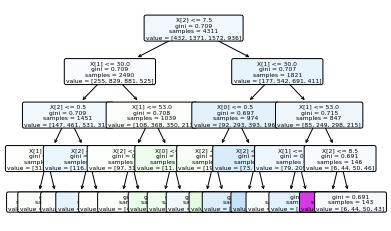

<Figure size 720x720 with 0 Axes>

In [61]:
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

import sklearn
print(sklearn.__version__)

from sklearn import tree
clf=DecisionTreeClassifier(max_depth=4,random_state=0)
clf.fit(x_train,y_train)
tree.plot_tree(clf,fontsize=6,filled=True, 
              rounded=True)
plt.figure(figsize=(10,10))
plt.savefig('mov.png')
from matplotlib import pyplot as plt

In [62]:
acc_dec= round(decision_tree.score(x_train,y_train) * 100, 2)
acc_dec

41.68

GAUSSIAN NAIVE BAYES

In [63]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gauss=gaussian.fit(x_train,y_train)
Y_pred = gaussian.predict(x_test)
Y_pred

array([2., 3., 3., ..., 3., 3., 3.])

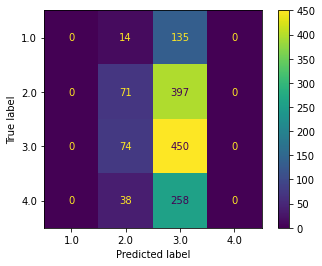

In [64]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gauss,x_test,y_test)

In [65]:
acc_gaussian = round(gaussian.score(x_train,y_train) * 100, 2)
acc_gaussian

36.63

KNN 

In [69]:
# K Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_predic = knn.predict(x_test)
Y_predic

array([1., 3., 4., ..., 2., 3., 2.])

In [33]:
#KNN PLOTTING

In [70]:
acc_knn = round(knn.score(x_train,y_train) * 100, 2)
acc_knn

33.66

In [71]:
models = pd.DataFrame({
    'Model': [ 'KNN','Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [ acc_knn, acc_random_forest, acc_gaussian,acc_dec]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,41.68
3,Decision Tree,41.68
2,Naive Bayes,36.63
0,KNN,33.66


In [79]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Braveheart (1995)              232
Toy Story (1995)               214
Usual Suspects, The (1995)     202
Apollo 13 (1995)               200
Seven (a.k.a. Se7en) (1995)    199
Name: rating, dtype: int64

In [39]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
Ace Ventura: When Nature Calls (1995),2.076923
"Addiction, The (1995)",1.000000
Amateur (1994),1.000000
"Amazing Panda Adventure, The (1995)",2.333333
"American President, The (1995)",2.782609


In [40]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
Ace Ventura: When Nature Calls (1995),2.076923,78
"Addiction, The (1995)",1.000000,1
Amateur (1994),1.000000,1
"Amazing Panda Adventure, The (1995)",2.333333,3
"American President, The (1995)",2.782609,69


In [41]:
movie_Recommendation = movie_rating_df.pivot_table(index='userId',columns='title',values='rating')
movie_Recommendation

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [42]:
a=input("Enter the movie name ")
n=int(input("Enter the number of recommendations needed "))
movie_name = movie_Recommendation[a]
movie_name.head()

Enter the movie name Apollo 13 (1995)
Enter the number of recommendations needed 5


userId
1    NaN
2    NaN
3    NaN
4    NaN
5    3.0
Name: Apollo 13 (1995), dtype: float64

In [43]:
ss = movie_Recommendation.corrwith(movie_name)

In [40]:
corr_ = pd.DataFrame(ss,columns=['Correlation'])
corr_.dropna(inplace=True)
corr_.head()


,Correlation
title,
"'burbs, The (1989)",0.034329
(500) Days of Summer (2009),0.352152
*batteries not included (1987),0.419314
...And Justice for All (1979),-1.000000
10 Cloverfield Lane (2016),0.188982


In [41]:
corr_.sort_values('Correlation',ascending=False).head(n)

,Correlation
title,
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0
Angel-A (2005),1.0
Poison Ivy (1992),1.0
Dr. Jekyll and Mr. Hyde (1931),1.0
Police Academy 6: City Under Siege (1989),1.0


In [42]:
corr_ = corr_.join(ratings['num of ratings'])
corr_.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",0.034329,NaN
(500) Days of Summer (2009),0.352152,NaN
*batteries not included (1987),0.419314,NaN
...And Justice for All (1979),-1.000000,NaN
10 Cloverfield Lane (2016),0.188982,NaN


In [45]:
rec=corr_[corr_['num of ratings']>100].sort_values('Correlation',ascending=False).head()


In [47]:
rec['num of ratings']

title
Apollo 13 (1995)         200.0
Net, The (1995)          102.0
Batman Forever (1995)    128.0
Crimson Tide (1995)      101.0
Babe (1995)              124.0
Name: num of ratings, dtype: float64